# Setup

In [1]:
# import your standard packages
%run pkgs.py
%run pars.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
figpath = '../figures/'

depth = '50_225'
Depth = '50-225'



## Read Data

In [3]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
# ds_SLA


In [4]:
# SLA
ds_SLA_ia = xr.open_dataset('../data/sla_to_wod.nc')
# ds_SLA_ia

In [5]:
# WOD
ds_WOD = xr.open_dataset('../data/wod_coastal_processed.nc')
# ds_WOD


In [6]:
# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')

# lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
posIODyears = list(np.array(ds_DMI.pos_IOD_years)) #[1994,1997,2006,2012,2015]
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) #[1996,1998,2001,2010,2014,2016]


# ds_DMI

# Oxygen and Temp  vs SLA

3.2656395318492226e-22 0.5943732539049988
3.2656395318496463e-22 0.5943732539049991
1.9125289756855477e-51 0.496202644463349
1.912528975685597e-51 0.49620264446334916
1.7830236417630032e-17 0.7850821190623826
1.783023641763021e-17 0.7850821190623826
2.1855062959730407e-20 0.5007937649189663
2.1855062959726317e-20 0.5007937649189665
0.0 0.5774665559339424
0.0 0.5774665559339424
0.0 0.44359902050150396
0.0 0.4435990205015037
8.413917948512534e-105 0.5141670704205216
8.413917948528644e-105 0.5141670704205215
1.875485988040536e-257 0.3697159388157139
1.8754859880579064e-257 0.36971593881571385
1.3207682363497726e-15 -0.601037329211813
1.3207682363498482e-15 -0.6010373292118125
5.131277613601347e-08 -0.5609421133328747
5.131277613601533e-08 -0.5609421133328742
0.0310403865210301 -0.576181892040311
0.03104038652103022 -0.5761818920403109
1.1814820290383385e-13 -0.6832132656329141
1.1814820290383915e-13 -0.6832132656329137
5.781724737724294e-13 -0.625688465199102
5.781724737724418e-13 -0.6256

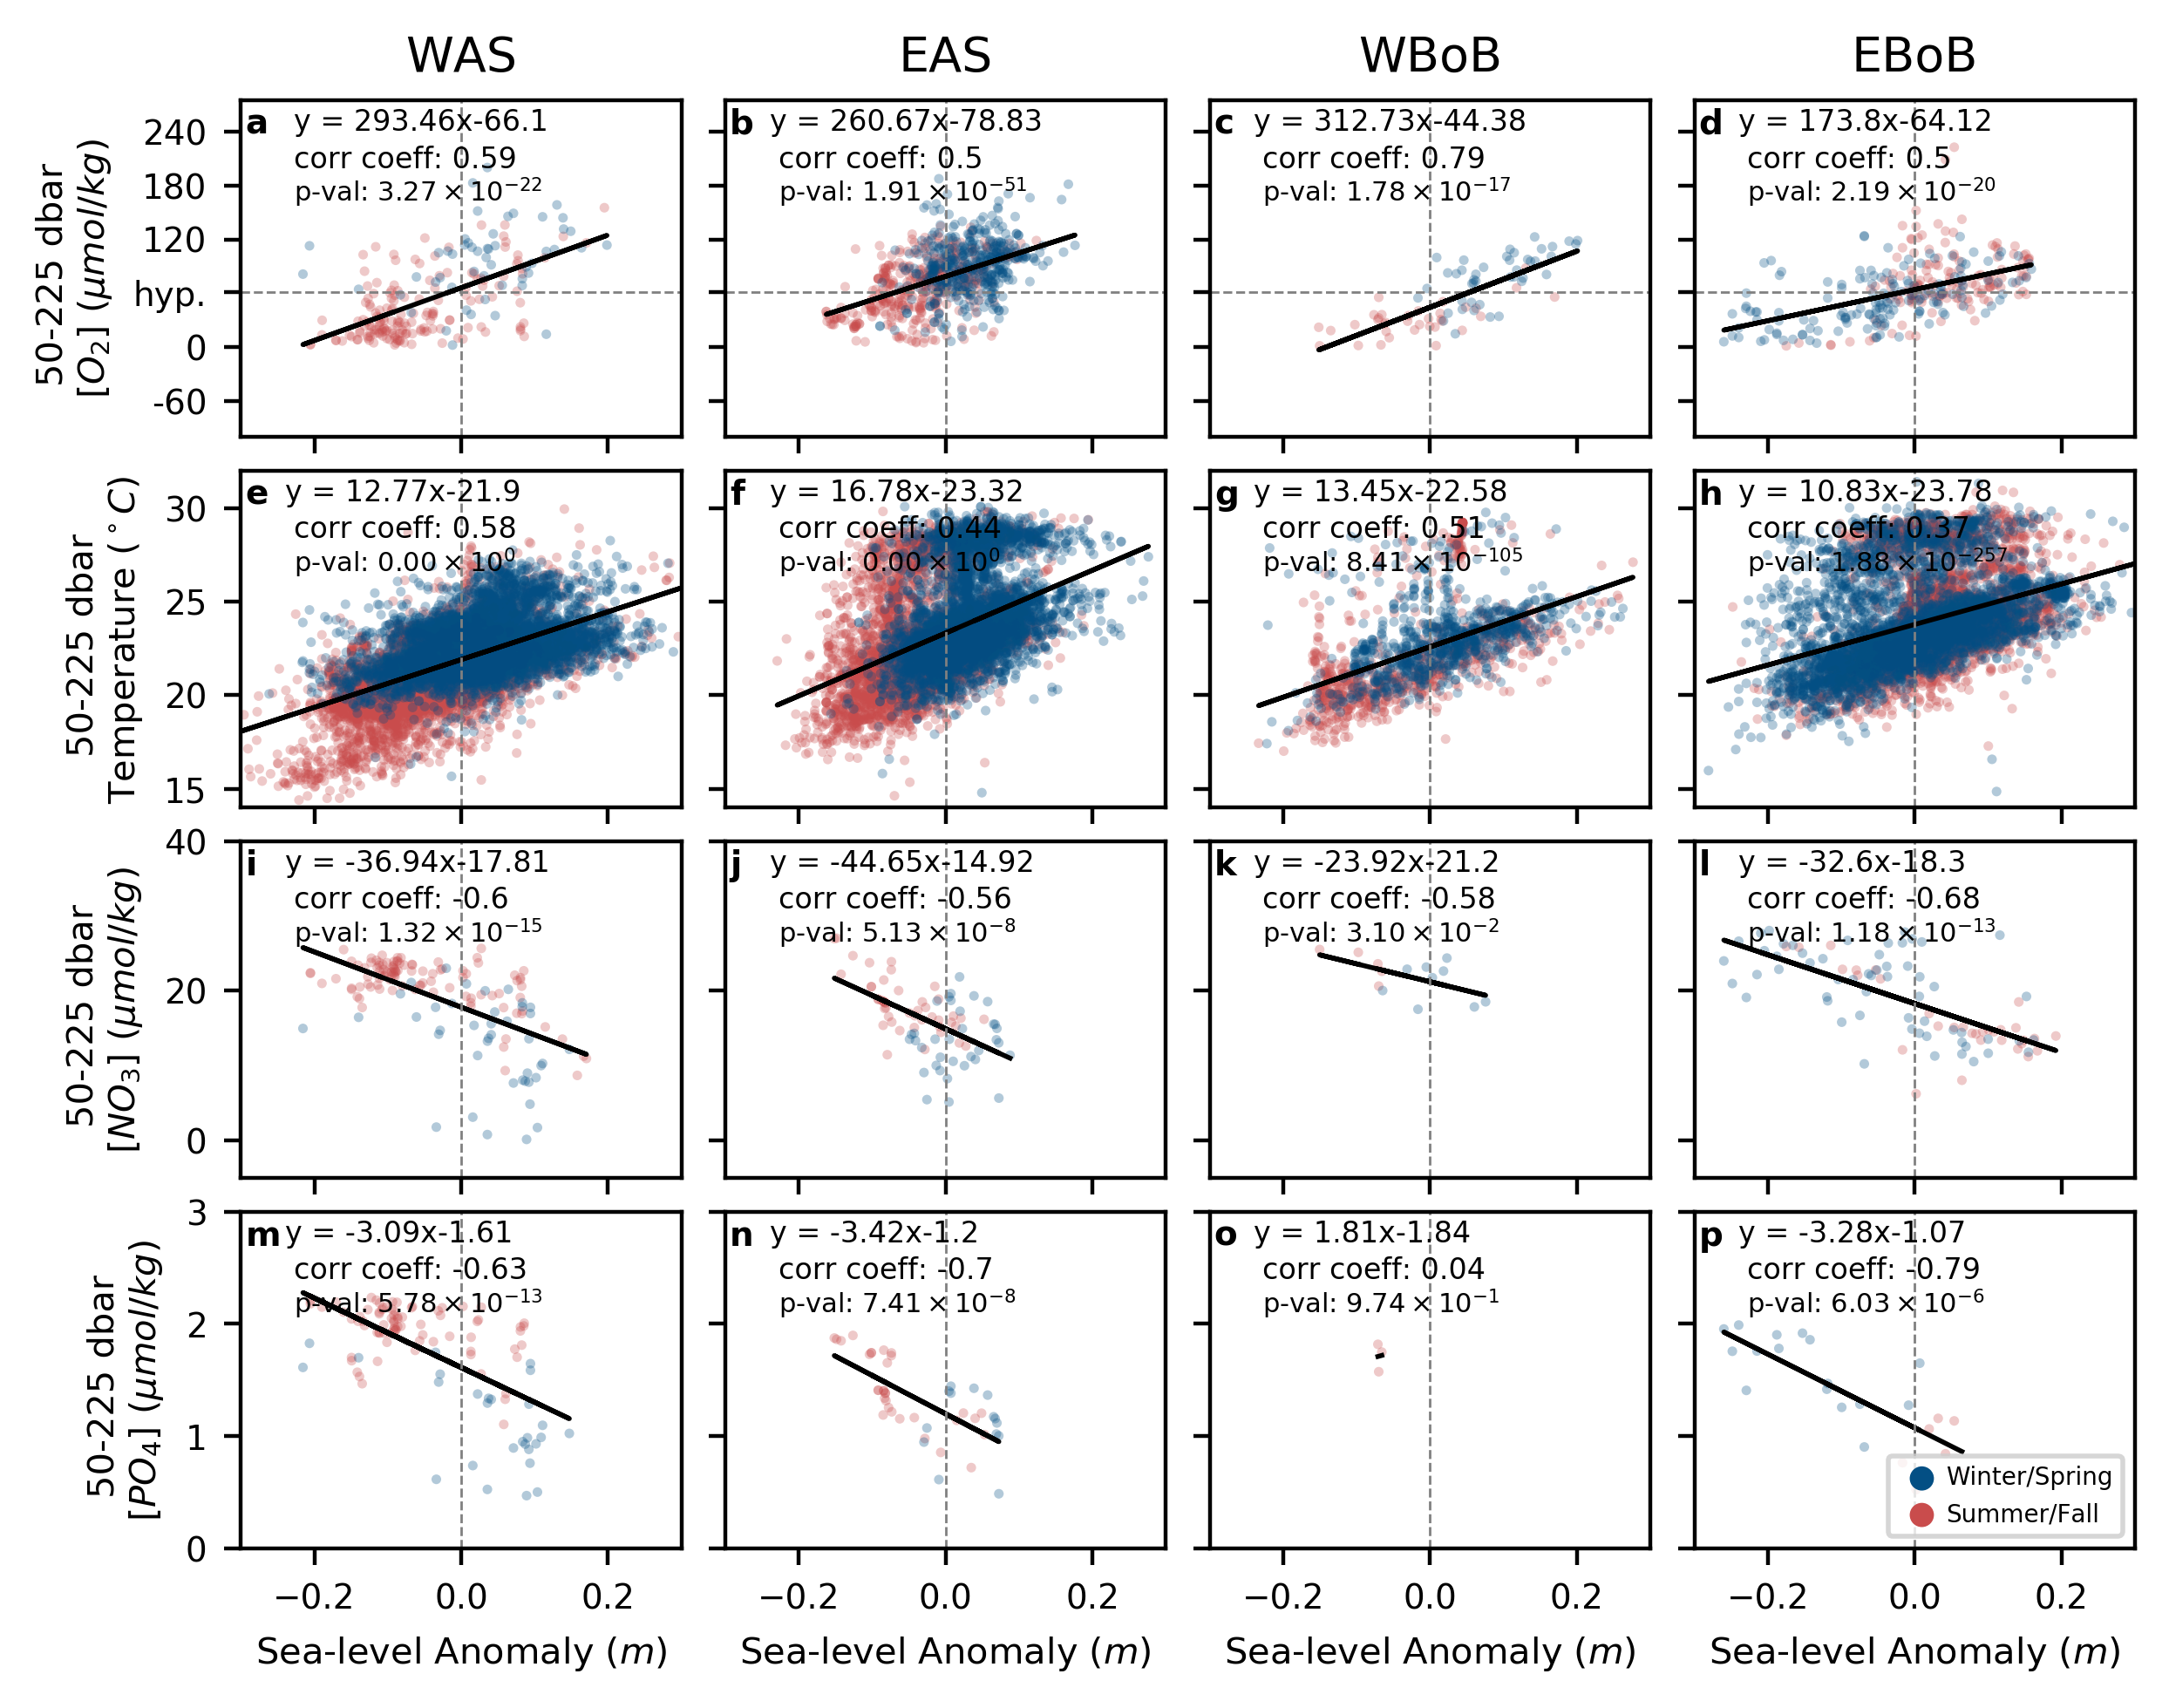

In [7]:

############################################################################
doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

seas_wAS_ia = ds_WOD['seas_wAS']
seas_eAS_ia = ds_WOD['seas_eAS']
seas_wBoB_ia = ds_WOD['seas_wBoB']
seas_eBoB_ia = ds_WOD['seas_eBoB']

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

nitrate_wAS_ia = ds_WOD['nitrate_wAS_' + depth]
nitrate_eAS_ia = ds_WOD['nitrate_eAS_' + depth]
nitrate_wBoB_ia = ds_WOD['nitrate_wBoB_' + depth]
nitrate_eBoB_ia = ds_WOD['nitrate_eBoB_' + depth]

phosphate_wAS_ia = ds_WOD['phosphate_wAS_' + depth]
phosphate_eAS_ia = ds_WOD['phosphate_eAS_' + depth]
phosphate_wBoB_ia = ds_WOD['phosphate_wBoB_' + depth]
phosphate_eBoB_ia = ds_WOD['phosphate_eBoB_' + depth]

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,5.5),dpi=400)


regions = ['WAS','EAS','WBoB','EBoB']
sz = 4
fsz = 6
lfz = 7
lw = 1
alpha = .3


xlim = [-0.3,0.3]
ylim = [-100,275]

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
s_clr = '#c94c4c'
w_clr = '#034f84'
piod_clr = 'darkgreen'
niod_clr = 'purple'

params = {'legend.fontsize': 5,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':7,
         'ytick.labelsize':7}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(441)
var1 = sla_wAS_ia
var2 = doxy_wAS_ia
seas = seas_wAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[0])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([-60,0,'hyp.',120,180,240])
ax.set_ylabel(Depth + ' dbar \n[$O_2$] ($\mu mol/ kg$)')
add_letter(ax, 'a', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.12,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(442)
var1 = sla_eAS_ia
var2 = doxy_eAS_ia
seas = seas_eAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[1])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])

add_letter(ax, 'b', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(443)
var1 = sla_wBoB_ia
var2 = doxy_wBoB_ia
seas = seas_wBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[2])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'c', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(444)
var1 = sla_eBoB_ia
var2 = doxy_eBoB_ia
seas = seas_eBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[3])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'd', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)


#####################################################################
ylim = [14,32]

ax = fig.add_subplot(445)
var1 = sla_wAS_ia
var2 = temp_wAS_ia
seas = seas_wAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
# ax.set_yticklabels([-60,0,'hyp.',120,180,240])
ax.set_ylabel(Depth + ' dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'e', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)



ax = fig.add_subplot(446)
var1 = sla_eAS_ia
var2 = temp_eAS_ia
seas = seas_eAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'f', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)


ax = fig.add_subplot(447)
var1 = sla_wBoB_ia
var2 = temp_wBoB_ia
seas = seas_wBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'g', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(448)
var1 = sla_eBoB_ia
var2 = temp_eBoB_ia
seas = seas_eBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'h', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

#####################################################################
ylim = [-5,40]

ax = fig.add_subplot(449)
var1 = sla_wAS_ia
var2 = nitrate_wAS_ia
seas = seas_wAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
# ax.set_yticklabels([-60,0,'hyp.',120,180,240])
ax.set_ylabel(Depth + ' dbar \n[$NO_3$] ($\mu mol/ kg$)')
add_letter(ax, 'i', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)



ax = fig.add_subplot(4,4,10)
var1 = sla_eAS_ia
var2 = nitrate_eAS_ia
seas = seas_eAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'j', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)


ax = fig.add_subplot(4,4,11)
var1 = sla_wBoB_ia
var2 = nitrate_wBoB_ia
seas = seas_wBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'k', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(4,4,12)
var1 = sla_eBoB_ia
var2 = nitrate_eBoB_ia
seas = seas_eBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'l', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)



#####################################################################
ylim = [0,3]

ax = fig.add_subplot(4,4,13)
var1 = sla_wAS_ia
var2 = phosphate_wAS_ia
seas = seas_wAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
# ax.set_yticklabels([-60,0,'hyp.',120,180,240])
ax.set_ylabel(Depth + ' dbar \n[$PO_4$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'm', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)



ax = fig.add_subplot(4,4,14)
var1 = sla_eAS_ia
var2 = phosphate_eAS_ia
seas = seas_eAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'n', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)


ax = fig.add_subplot(4,4,15)
var1 = sla_wBoB_ia
var2 = phosphate_wBoB_ia
seas = seas_wBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'o', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(4,4,16)
var1 = sla_eBoB_ia
var2 = phosphate_eBoB_ia
seas = seas_eBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'p', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)


ax.scatter(np.nan,np.nan,c = w_clr, s= sz, edgecolor = 'none', label = 'Winter/Spring')
ax.scatter(np.nan,np.nan,c = s_clr, s= sz, edgecolor = 'none', label = 'Summer/Fall')
# ax.axhline(y = -1,color = 'gray',linestyle = '--', linewidth = 0.5, label = 'hypoxia')
plt.legend(loc = 'lower right', handletextpad = 0.001, markerscale = 2.5)

plt.subplots_adjust(wspace = 0.1,hspace = 0.1)

plt.savefig(figpath + 'corr_sla_' + depth + '.pdf', format='pdf', dpi = 400)


# doxy vs temp

9.044870787761245e-116 0.809770976413372
9.044870787758287e-116 0.8097709764133719
2.116503593599814e-273 0.7522893055741835
2.1165035935931954e-273 0.7522893055741833
9.774964686045596e-55 0.8770619619332839
9.774964686048322e-55 0.8770619619332835
7.133145448954165e-135 0.7166843355511341
7.133145448951622e-135 0.7166843355511344


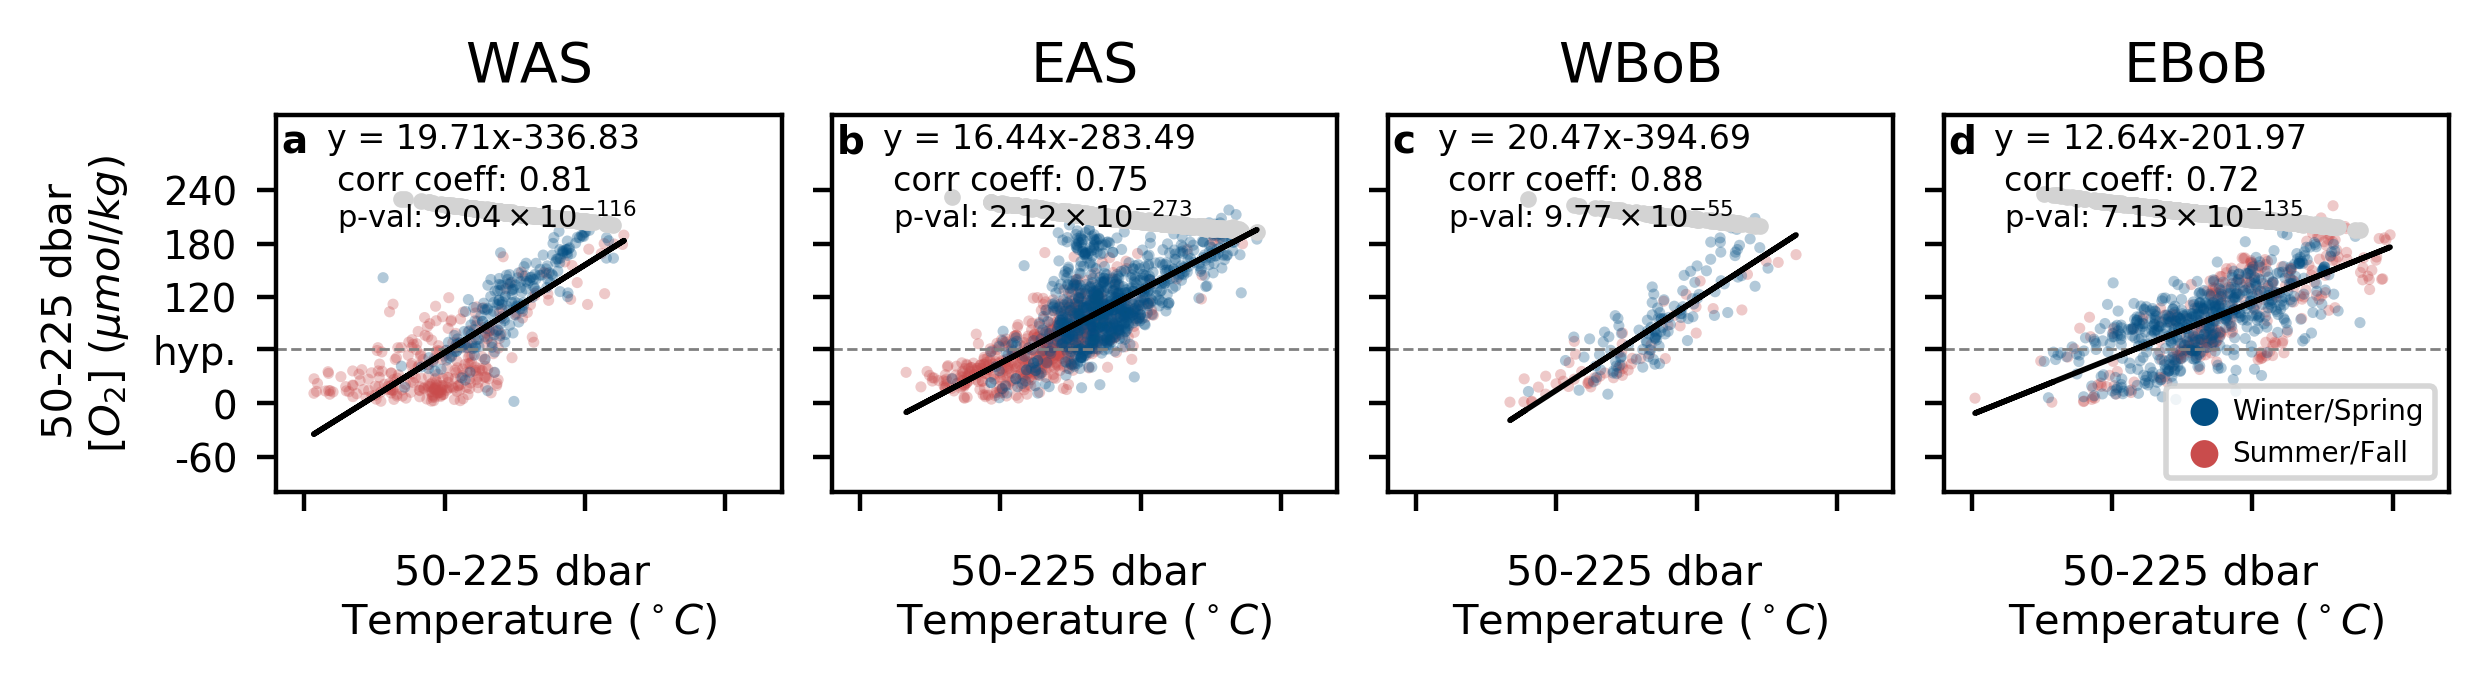

In [8]:

############################################################################
doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

O2_sat_wAS_ia = ds_WOD['O2_sat_wAS_' + depth]
O2_sat_eAS_ia = ds_WOD['O2_sat_eAS_' + depth]
O2_sat_wBoB_ia = ds_WOD['O2_sat_wBoB_' + depth]
O2_sat_eBoB_ia = ds_WOD['O2_sat_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

seas_wAS_ia = ds_WOD['seas_wAS']
seas_eAS_ia = ds_WOD['seas_eAS']
seas_wBoB_ia = ds_WOD['seas_wBoB']
seas_eBoB_ia = ds_WOD['seas_eBoB']

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

nitrate_wAS_ia = ds_WOD['nitrate_wAS_' + depth]
nitrate_eAS_ia = ds_WOD['nitrate_eAS_' + depth]
nitrate_wBoB_ia = ds_WOD['nitrate_wBoB_' + depth]
nitrate_eBoB_ia = ds_WOD['nitrate_eBoB_' + depth]

phosphate_wAS_ia = ds_WOD['phosphate_wAS_' + depth]
phosphate_eAS_ia = ds_WOD['phosphate_eAS_' + depth]
phosphate_wBoB_ia = ds_WOD['phosphate_wBoB_' + depth]
phosphate_eBoB_ia = ds_WOD['phosphate_eBoB_' + depth]

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,1.25),dpi=400)

sz = 4
fsz = 6
lfz = 7
lw = 1
alpha = .3


xlim = [14,32]
ylim = [-100,325]

regions = ['WAS','EAS','WBoB','EBoB']

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
s_clr = '#c94c4c'
w_clr = '#034f84'
piod_clr = 'darkgreen'
niod_clr = 'purple'
sat_clr = 'lightgray'

params = {'legend.fontsize': 5,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':7,
         'ytick.labelsize':7}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(141)
var1 = temp_wAS_ia
var2 = doxy_wAS_ia
var3 = O2_sat_wAS_ia
seas = seas_wAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
var3 = var3[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.scatter(var1[ind],var3[ind],c = sat_clr,s= sz)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[0])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([-60,0,'hyp.',120,180,240])
ax.set_xlabel(Depth + ' dbar \nTemperature ($^\circ C$)')
ax.set_ylabel(Depth + ' dbar \n[$O_2$] ($\mu mol/ kg$)')
add_letter(ax, 'a', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(142)
var1 = temp_eAS_ia
var2 = doxy_eAS_ia
var3 = O2_sat_eAS_ia
seas = seas_eAS_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
var3 = var3[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.scatter(var1[ind],var3[ind],c = sat_clr,s= sz)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[1])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel(Depth + ' dbar \nTemperature ($^\circ C$)')
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'b', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(143)
var1 = temp_wBoB_ia
var2 = doxy_wBoB_ia
var3 = O2_sat_wBoB_ia
seas = seas_wBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
var3 = var3[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.scatter(var1[ind],var3[ind],c = sat_clr,s= sz)
ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[2])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel(Depth + ' dbar \nTemperature ($^\circ C$)')
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'c', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)

ax = fig.add_subplot(144)
var1 = temp_eBoB_ia
var2 = doxy_eBoB_ia
var3 = O2_sat_eBoB_ia
seas = seas_eBoB_ia

ind = np.isnan(var1) | np.isnan(var2)
var1 = var1[~ind]
var2 = var2[~ind]
var3 = var3[~ind]
seas = seas[~ind]

#s/f
ind = seas == 1
ax.scatter(var1[ind],var2[ind],c = s_clr, s= sz,alpha = alpha, edgecolor = 'none')
#w/s
ind = seas == 0
ax.scatter(var1[ind],var2[ind],c = w_clr, s= sz,alpha = alpha, edgecolor = 'none')

ax.scatter(var1[ind],var3[ind],c = sat_clr,s= sz)

ax.axhline(y = hyp_thresh,color = 'gray',linestyle = '--', linewidth = 0.5)
ax.axvline(x = 0,color = 'gray',linestyle = '--', linewidth = 0.5)

m, b, r, p_val,_ =stats.linregress(var1, var2)
print(p_val,r)
r,p_val = stats.pearsonr(var1,var2)
print(p_val,r)
ax.plot(var1, m*var1 + b, 'k', linewidth = lw)
ax.set_title(regions[3])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel(Depth + ' dbar \nTemperature ($^\circ C$)')
ax.set_xticklabels([])
ax.set_yticks([-60,0,61,120,180,240])
ax.set_yticklabels([])
add_letter(ax, 'd', x = 0.01,y=0.9, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.12,y=0.8, fontsize = fsz)
add_text(ax, 'p-val: ' + r'${0:s}$'.format(as_si(p_val,2)), x = 0.12,y=0.7, fontsize = fsz-0.5)



ax.scatter(np.nan,np.nan,c = w_clr, s= sz, edgecolor = 'none', label = 'Winter/Spring')
ax.scatter(np.nan,np.nan,c = s_clr, s= sz, edgecolor = 'none', label = 'Summer/Fall')
# ax.axhline(y = -1,color = 'gray',linestyle = '--', linewidth = 0.5, label = 'hypoxia')
plt.legend(loc = 'lower right', handletextpad = 0.001, markerscale = 2.5)

plt.subplots_adjust(wspace = 0.1)

plt.savefig(figpath + 'corr_doxy_temp_' + depth + '.pdf', format='pdf', dpi = 400)



# Spatial Map of Points Used for Correlations

In [ ]:
doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

lat_wAS_ia = ds_SLA_ia['lat_wAS']
lat_eAS_ia = ds_SLA_ia['lat_eAS']
lat_wBoB_ia = ds_SLA_ia['lat_wBoB']
lat_eBoB_ia = ds_SLA_ia['lat_eBoB']

lon_wAS_ia = ds_SLA_ia['lon_wAS']
lon_eAS_ia = ds_SLA_ia['lon_eAS']
lon_wBoB_ia = ds_SLA_ia['lon_wBoB']
lon_eBoB_ia = ds_SLA_ia['lon_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8/2.54,1.5),dpi=400)

sz = 1.5
sq_sz = 60
fsz = 12
alpha = 0.25
lfz = 6

sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 6,
         'axes.labelsize': 8,
         'axes.titlesize': 8,
         'xtick.labelsize':6,
         'ytick.labelsize':6}

pylab.rcParams.update(params)

##############################################################
ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
ind = np.isnan(sla_wAS_ia) | np.isnan(temp_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eAS_ia) | np.isnan(temp_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g', marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB_ia) | np.isnan(temp_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eBoB_ia) | np.isnan(temp_eBoB_ia)
p = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='r', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ax.set_title('Temperature & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'a', x = 0.01,y=0.94, fontsize = lfz)

ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ind = np.isnan(sla_wAS_ia) | np.isnan(doxy_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k',marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eAS_ia) | np.isnan(doxy_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g',marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB_ia) | np.isnan(doxy_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eBoB_ia) | np.isnan(doxy_eBoB_ia)
lep = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='r', marker = '.', 
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree())
ax.set_title('Oxygen & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.ylabels_left = False
add_letter(ax, 'b', x = 0.01,y=0.94, fontsize = lfz)

ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
ind = np.isnan(doxy_wAS_ia) | np.isnan(temp_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k', marker = '.',
               edgecolor = 'none', s = sz,transform=ccrs.PlateCarree(), label = 'WAS')
ind = np.isnan(doxy_eAS_ia) | np.isnan(temp_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g',  marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree(), label = 'EAS')
ind = np.isnan(doxy_wBoB_ia) | np.isnan(temp_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b',  marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree(), label = 'WBoB')
ind = np.isnan(doxy_eBoB_ia) | np.isnan(temp_eBoB_ia)
p = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='r',  marker = '.',
               edgecolor = 'none',s = sz,transform=ccrs.PlateCarree(), label = 'EBoB')
ax.set_title('Temperature & Oxygen Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.ylabels_left = False
add_letter(ax, 'c', x = 0.01,y=0.94, fontsize = lfz)

plt.subplots_adjust(wspace = 0.1)
plt.legend(markerscale=5, ncol = 2, loc = 'upper right')

plt.savefig(figpath + 'corr_doxy_temp_sla_loc_map_' + depth + '.pdf', format='pdf', dpi = 400)